In [ ]:
import sys
sys.path.append("..")

In [2]:
import geopandas as gpd
from fractopo import branches_and_nodes
from pathlib import Path
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString, Point, MultiLineString, MultiPoint
from shapely.wkt import loads
from tval import trace_validator, trace_builder

/home/nialov/.local/share/virtualenvs/fractopo-YImANkM_/lib/python3.8/site-packages/geopandas/_compat.py:84: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  warnings.warn(


In [3]:
#gdf = gpd.GeoDataFrame({"geometry": trace_builder.make_valid_traces()})
gdf = gpd.read_file("../tests/sample_data/Inkoo_traces.gpkg", layer="Drone_all_traces")
snap_threshold = 0.001
snap_threshold_multiplier = 1.1
area_t_m = 5
trace_validator.BaseValidator.set_snap_threshold_and_multipliers(snap_threshold, snap_threshold_multiplier, area_t_m)
%pdb

Automatic pdb calling has been turned ON


In [4]:
snapped_traces, any_changes_applied = branches_and_nodes.snap_traces(gdf.geometry, snap_threshold)
iterrations = 0
while any_changes_applied:
    snapped_traces, any_changes_applied = branches_and_nodes.snap_traces(snapped_traces, snap_threshold)
    iterrations +=1
    print(iterrations)

../fractopo/branches_and_nodes.py:381: RuntimeWarning: invalid value encountered in arccos
  rad_angle = np.arccos(dot_product)
../fractopo/branches_and_nodes.py:381: RuntimeWarning: invalid value encountered in arccos
  rad_angle = np.arccos(dot_product)
../fractopo/branches_and_nodes.py:381: RuntimeWarning: invalid value encountered in arccos
  rad_angle = np.arccos(dot_product)
../fractopo/branches_and_nodes.py:381: RuntimeWarning: invalid value encountered in arccos
  rad_angle = np.arccos(dot_product)
2759-WARNING-Non-simple geometry detected.
LINESTRING (346476.7193999998 6659478.227399999, 346476.7934999997 6659477.804099999, 346477.0898000002 6659476.7457, 346476.9840000002 6659477.1055, 346476.9197000004 6659477.353399999, 346476.8464000002 6659476.9362, 346476.7406000001 6659476.639900001, 346476.7406000001 6659476.523499999)
../fractopo/branches_and_nodes.py:381: RuntimeWarning: invalid value encountered in arccos
  rad_angle = np.arccos(dot_product)
../fractopo/branches_and

1


In [5]:
gpd.GeoDataFrame({"geometry": snapped_traces}).to_file("../dev/snapped_traces.gpkg", driver="GPKG")

In [6]:
det_nodes, _ = trace_validator.BaseValidator.determine_nodes(gpd.GeoDataFrame({"geometry": snapped_traces}))

In [7]:
# 351912.6087073,6654866.7294920
# 351020.96285,6655790.12293

In [8]:
nodes = branches_and_nodes.remove_identical_sindex(gpd.GeoSeries(det_nodes), snap_threshold)

In [9]:
node_identities = branches_and_nodes.get_node_identities(snapped_traces, nodes, snap_threshold)

In [10]:
branches = branches_and_nodes.split_traces_to_branches_with_traces(snapped_traces, nodes, node_identities, snap_threshold)

In [11]:
branch_identities = branches_and_nodes.get_branch_identities(branches, nodes, node_identities, snap_threshold)

2759-ERROR-Did not find 2 XYI-nodes that intersected branch endpoints.
branch: LINESTRING (346479.7686221906 6659506.526712228, 346479.7685789577 6659506.526703852)
nodes_that_intersect[type_column]: 4509    X
Name: Type, dtype: object

2759-ERROR-Did not find 2 XYI-nodes that intersected branch endpoints.
branch: LINESTRING (346609.0696875333 6659386.551957853, 346609.070667265 6659386.55191272)
nodes_that_intersect[type_column]: 5404    X
Name: Type, dtype: object

2759-ERROR-Did not find 2 XYI-nodes that intersected branch endpoints.
branch: LINESTRING (346609.0696875333 6659386.551957853, 346609.0702 6659386.551999999, 346609.070667265 6659386.55191272)
nodes_that_intersect[type_column]: 5404    X
Name: Type, dtype: object

2759-ERROR-Did not find 2 XYI-nodes that intersected branch endpoints.
branch: LINESTRING (346666.5653788446 6659414.989706963, 346666.5651705642 6659414.989640432)
nodes_that_intersect[type_column]: 5685    X
Name: Type, dtype: object

2759-ERROR-Did not find 2

In [12]:
branch_gdf = gpd.GeoDataFrame({"geometry": branches, "Type": branch_identities})
node_gdf = gpd.GeoDataFrame({"geometry": nodes, "Type": node_identities})

<AxesSubplot:>

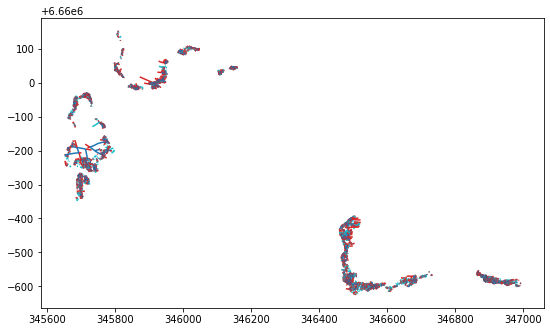

In [13]:
fig, ax = plt.subplots(figsize=(9, 9))
branch_gdf.plot(ax=ax, column="Type", label="Type")
#node_gdf.plot(ax=ax, column="Type", label="Type", zorder=10, legend=True)

In [14]:
branch_gdf.to_file("../dev/branches.gpkg", driver="GPKG")
node_gdf.to_file("../dev/nodes.gpkg", driver="GPKG")